In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,TimeSeriesSplit
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix, r2_score
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from scipy import stats
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense, Dropout, Bidirectional, Layer,BatchNormalization
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import numpy as np
import pandas as pd
import tensorflow as tf
import random
import os
from tensorflow.keras.initializers import GlorotUniform
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tqdm import tqdm
from datetime import timedelta
from pandas.tseries.offsets import BDay
import yfinance as yf
from scipy import stats
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, BatchNormalization, Attention, Concatenate, RepeatVector, TimeDistributed
from tensorflow.keras import backend as K

#Run the following pip install/uninstall command for pmdarima

In [ ]:
#Uninstall all conflicting packages
!pip uninstall -y numpy pmdarima Cython scikit-learn scipy

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
Found existing installation: Cython 3.1.2
Uninstalling Cython-3.1.2:
  Successfully uninstalled Cython-3.1.2
Found existing installation: scikit-learn 1.7.0
Uninstalling scikit-learn-1.7.0:
  Successfully uninstalled scikit-learn-1.7.0
Found existing installation: scipy 1.10.1
Uninstalling scipy-1.10.1:
  Successfully uninstalled scipy-1.10.1


In [ ]:
#Reinstall clean and compatible versions
!pip install --no-cache-dir numpy==1.26.4 Cython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 44.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cvxpy 1.6.6 requires scipy>=1.11.0, which is not installed.
jaxlib 0.5.1 requires scipy>=1.11.1, which is not installed.
matplotlib-venn 1.1.2 requires scipy, which is not installed.
yellowbrick 1.5 requires scikit-learn>=1.0.0, which is not installed.
yellowbrick 1.5 requires scipy>=1.0.0, which is not installed.
shap 0.48.0 requires scikit-learn, which is not installed.
shap 0.48.0 requires scipy, which is not installed.
lightgbm 4.5.0 requires scipy, which is not installed.
osqp 1.0.4 requires scipy>=0.13.2, which is not installed.
arviz 0.21.0 requires scipy>=1.9.0, which is no

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 196.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━ 8.9/12.9 MB 101.0 MB/s eta 0:00:01
ERROR: Operation cancelled by user
^C


In [ ]:
!pip install --no-cache-dir scipy scikit-learn
#Had to downgrade scripy to bypass this error cannot import name '_lazywhere' from 'scipy._lib._util' (/usr/local/lib/python3.11/dist-packages/scipy/_lib/_util.py)
!pip install --no-cache-dir scipy==1.10.1
!pip install --no-cache-dir pmdarima
!pip install prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 205.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 194.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.14.6 requires scipy<1.16.0,>=1.8.0, but you have scipy 1.16.0 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 260.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.0
    Uninstalling scipy-1.16.0:
      Successfully uninstalled scipy-1.16.0
ERROR: pip's dependency resolver does not currently take into account

In [ ]:
import numpy
print("NumPy version:", numpy.__version__)

import scipy
print("SciPy version:", scipy.__version__)

from pmdarima import auto_arima
print("pmdarima is working.")

NumPy version: 1.26.4
SciPy version: 1.10.1
pmdarima is working.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Checking whether the Google Drive path exists or not

In [ ]:
!ls -l "/content/drive/My Drive/Stock Price Prediction Project/DataSet"

total 711694
-rw------- 1 root root      3429 Jul  8 16:58 final_forecasts_with_all_models.csv
-rw------- 1 root root       178 Jul  9 02:47 final_forecasts_with_all_models.gsheet
-rw------- 1 root root     27073 Jul  7 17:36 next_day_predicted_price_comparison.csv
-rw------- 1 root root       178 Jul  7 17:38 next_day_predicted_price_comparison.gsheet
-rw------- 1 root root 147033850 Feb  3 04:28 SnP_daily_update.csv
-rw------- 1 root root  99822247 Jun 17 05:18 SnP_daily_update.xlsx
-rw------- 1 root root 175096262 Jul  1 15:38 stock_data_long_filled.csv
-rw------- 1 root root 166846261 Jul  1 15:38 stock_data_long_nonempty.csv
-rw------- 1 root root 139943382 Jul  1 15:37 stock_data_wide.csv


#Checking whether the file exist or not

In [ ]:
import os
file_path1 = '/content/drive/My Drive/Stock Price Prediction Project/DataSet/stock_data_wide.csv'
file_path2 = '/content/drive/My Drive/Stock Price Prediction Project/DataSet/stock_data_long_filled.csv'
file_path3 = '/content/drive/My Drive/Stock Price Prediction Project/DataSet/stock_data_long_nonempty.csv'

print("file_path1 exists :",os.path.exists(file_path1))
print("file_path1 exists :",os.path.exists(file_path2))
print("file_path1 exists :",os.path.exists(file_path3))

file_path1 exists : True
file_path1 exists : True
file_path1 exists : True


#Load Preprocessed Data

In [ ]:
df_long_filled = pd.read_csv("/content/drive/My Drive/Stock Price Prediction Project/DataSet/stock_data_long_filled.csv")

#Filter a Single Stock (AAPL)

In [ ]:
df_long_filled['Date'] = pd.to_datetime(df_long_filled['Date'])
df_aapl = df_long_filled[df_long_filled['Ticker'] == 'AAPL'].copy()

print(df_aapl.head())

           Date Ticker     Close      High       Low      Open       Volume
3794 2010-01-04   AAPL  6.447413  6.462175  6.398307  6.429940  493729600.0
3795 2010-01-05   AAPL  6.458559  6.495012  6.424515  6.465187  601904800.0
3796 2010-01-06   AAPL  6.355827  6.484167  6.349199  6.458559  552160000.0
3797 2010-01-07   AAPL  6.344077  6.386858  6.297983  6.379326  477131200.0
3798 2010-01-08   AAPL  6.386254  6.386857  6.298285  6.335641  447610800.0


#Feature Engineering

In [ ]:
# Basic Indicators
df_aapl['Return'] = df_aapl['Close'].pct_change()
df_aapl['RollingMean']=df_aapl['Close'].rolling(20).mean()
df_aapl['Volatility']=df_aapl['Close'].pct_change().rolling(20).std()
df_aapl['DayOfWeek'] = df_aapl['Date'].dt.dayofweek
df_aapl['Month'] = df_aapl['Date'].dt.month
df_aapl['MACD'] = df_aapl['Close'].ewm(12).mean() - df_aapl['Close'].ewm(26).mean()
df_aapl['ExpMA20'] = df_aapl['Close'].ewm(span=20).mean()
df_aapl['Momentum'] = df_aapl['Close'] - df_aapl['Close'].shift(5)

In [ ]:
# RSI(Relative Strength Index)
delta = df_aapl['Close'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
rs = avg_gain / avg_loss
df_aapl['RSI'] = 100 - (100 / (1 + rs))

In [ ]:
# Bollinger Bands
rolling_std = df_aapl['Close'].rolling(20).std()
df_aapl['Boll_Upper'] = df_aapl['RollingMean'] + (2 * rolling_std)
df_aapl['Boll_Lower'] = df_aapl['RollingMean'] - (2 * rolling_std)

In [ ]:
# Price Rate of Change
df_aapl['ROC'] = df_aapl['Close'].pct_change(periods=5)

#Outlier Handling using Z-score on Volumn only

In [ ]:
z_data = df_aapl[['Volume']].dropna()
z_scores = np.abs(stats.zscore(z_data))
non_outlier_mask = (z_scores < 3).all(axis=1).values.astype(bool)
df_aapl =df_aapl.loc[z_data.index[non_outlier_mask]].copy()

# Lag features

In [ ]:
for lag in [1, 2, 3]:
    df_aapl[f'Close_lag{lag}'] = df_aapl['Close'].shift(lag)

#Feature Selection

In [ ]:
lstm_features = ['Close_lag1', 'Close_lag2', 'Close_lag3','Close'] #'RollingMean','Volatility','MACD','ExpMA20','Momentum',

## Drop NA and prepare for scaling

In [ ]:
lstm_mv_df = df_aapl[['Date'] + lstm_features].dropna().copy()
lstm_mv_df.set_index('Date', inplace=True)

#Feature Scaling

In [ ]:
scaler = MinMaxScaler()
scaled_array = scaler.fit_transform(lstm_mv_df[lstm_features].astype(float))
df_scaled = pd.DataFrame(scaled_array, index=lstm_mv_df.index, columns=lstm_features)

In [ ]:
print(df_scaled.head())

            Close_lag1  Close_lag2  Close_lag3     Close
Date                                                    
2010-01-07    0.002251    0.002657    0.002613  0.002204
2010-01-08    0.002204    0.002251    0.002657  0.002371
2010-01-11    0.002371    0.002204    0.002251  0.002149
2010-01-12    0.002149    0.002371    0.002204  0.001864
2010-01-13    0.001864    0.002149    0.002371  0.002213


# Forecasting Preparation

In [ ]:
forecast_horizon = 30
future_dates = pd.bdate_range(start=df_scaled.index[-1] + BDay(1), periods=forecast_horizon)

#SARIMA (Seasonal ARIMA)

#Auto ARIMA for parameter tuning

In [ ]:
stepwise_model = auto_arima(df_aapl['Close'].dropna(), seasonal=True, m=5, stepwise=True, trace=True) #df_aapl['Close'].dropna()
order = stepwise_model.order
seasonal_order = stepwise_model.seasonal_order

print(stepwise_model.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[5] intercept   : AIC=14189.741, Time=15.34 sec
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=14185.208, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=14188.150, Time=0.97 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=14188.091, Time=2.69 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[5]             : AIC=14188.563, Time=0.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,0)[5] intercept   : AIC=14186.679, Time=1.56 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,1)[5] intercept   : AIC=14186.637, Time=0.85 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,1)[5] intercept   : AIC=14186.159, Time=6.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[5] intercept   : AIC=14186.690, Time=0.51 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[5] intercept   : AIC=14186.673, Time=0.65 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[5] intercept   : AIC=14187.550, Time=2.29 sec

Best model:  ARIMA(0,1,0)(0,0,0)[5] intercept
Total fit time: 31.684 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3724
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -7090.604
Date:                Wed, 09 Jul 2025   AIC                          14185.208
Time:                        12:39:32   BIC                          14197.653
Sample:                             0   HQIC                         14189.635
                               - 3724                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0617      0.027      2.315      0.021       0.00

#Fit SARIMA Model

In [ ]:
sarima_model = SARIMAX(df_aapl['Close'].dropna(), order=(3,2,0),
                       seasonal_order=(2,0,2,5),
                       enforce_stationarity=False, enforce_invertibility=False)

sarima_result = sarima_model.fit(disp=False)
sarima_forecast = sarima_result.forecast(steps=forecast_horizon)
sarima_forecast.index = future_dates

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index

# Prophet

In [ ]:
from prophet import Prophet

In [ ]:
# Reset index so 'Date' becomes a column
df_scaled_reset = df_aapl.reset_index()

In [ ]:
# Prepare DataFrame for Prophet
prophet_df = df_scaled_reset[['Date', 'Close']].dropna().rename(columns={'Date': 'ds', 'Close': 'y'})

prophet = Prophet(weekly_seasonality=True, yearly_seasonality=True)
prophet.add_seasonality(name='monthly', period=30.5, fourier_order=5)
prophet.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuxxazxya/ec0bwgjs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuxxazxya/vhbxgiks.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29361', 'data', 'file=/tmp/tmpuxxazxya/ec0bwgjs.json', 'init=/tmp/tmpuxxazxya/vhbxgiks.json', 'output', 'file=/tmp/tmpuxxazxya/prophet_modelqxqfhhhy/prophet_model-20250709124031.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:40:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# ✅ Forecast future dates
future_df = prophet.make_future_dataframe(periods=forecast_horizon, freq='B')
prophet_pred = prophet.predict(future_df)
prophet_forecast = prophet_pred.set_index('ds')['yhat'][-forecast_horizon:]

# Feature Engineering for XGBoost

In [ ]:
features = df_aapl.copy()
for lag in [1,2,3,5,10]:
    features[f'Close_lag{lag}'] = features['Close'].shift(lag)
features.dropna(inplace=True)
X_all = features.drop(columns=['Close'])
y_all = features['Close']

#XGBoost Direct Forecast with Grid Search

In [ ]:
xgb_params = {
    'n_estimators': [100,200],
    'learning_rate': [0.01,0.05,0.1],
    'max_depth': [3,5,7],
    'subsample': [0.7,1.0]
}

In [ ]:
ts_cv = TimeSeriesSplit(n_splits=5)
xgb_grid = GridSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', verbosity=0),
    param_grid=xgb_params,
    cv=ts_cv,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

In [ ]:
print("✅ X_all shape:", X_all.shape)
print("✅ y_all shape:", y_all.shape)

✅ X_all shape: (3709, 23)
✅ y_all shape: (3709,)


In [ ]:
# 1️⃣ Keep only numeric columns in X_all (if there are any object columns)
X_all = X_all.select_dtypes(include=[np.number])

# 2️⃣ Replace infinite values with NaN
X_all.replace([np.inf, -np.inf], np.nan, inplace=True)

# 3️⃣ Drop all rows with NaN values
X_all.dropna(inplace=True)

# 4️⃣ Align y_all with cleaned X_all
y_all = y_all.loc[X_all.index]

In [ ]:
# Check for NaNs or infinite values
print("🔍 Any NaNs in X_all?", X_all.isnull().values.any())
print("🔍 Any NaNs in y_all?", y_all.isnull().values.any())
print("🔍 Any infinite values in X_all?", np.isinf(X_all.values).any())
print("🔍 Any infinite values in y_all?", np.isinf(y_all.values).any())

🔍 Any NaNs in X_all? False
🔍 Any NaNs in y_all? False
🔍 Any infinite values in X_all? False
🔍 Any infinite values in y_all? False


In [ ]:
xgb_grid.fit(X_all, y_all)
xgb = xgb_grid.best_estimator_

In [ ]:
# Forecast loop
X_future = X_all.iloc[-1:].copy()
xgb_preds = []
for _ in range(forecast_horizon):
    pred = xgb_grid.predict(X_future)[0]
    xgb_preds.append(pred)
    next_input = X_future.iloc[0].values[1:].tolist() + [pred]
    X_future = pd.DataFrame([next_input], columns=X_all.columns)

xgb_forecast = pd.Series(xgb_preds, index=future_dates)

# Hybrid (SARIMA + XGBoost Residuals) Forecast

In [ ]:
#Compute residuals
residuals = df_aapl['Close'] - sarima_result.fittedvalues
res_df = pd.DataFrame({
    'Close': df_aapl['Close'],
    'residual': residuals
}).dropna()

In [ ]:
for lag in [1,2,3,5,10]:
    res_df[f'Close_lag{lag}'] = res_df['Close'].shift(lag)
res_df.dropna(inplace=True)

In [ ]:
if res_df.empty:
    raise ValueError("res_df is empty after generating lag features. Check date overlap.")

In [ ]:
#Prepare training data for residual model ---
X_res = res_df.drop(columns=['Close', 'residual'])
y_res = res_df['residual']

In [ ]:
res_model = XGBRegressor(n_estimators=100, learning_rate=0.1)
res_model.fit(X_res, y_res)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


#Predict residuals for future using same lag loop

In [ ]:
# --- Step 4: Forecast residuals iteratively using SARIMA forecast values ---
input_res = X_res.tail(1).copy()  # last available lag row
hybrid_res_preds = []

for i in range(forecast_horizon):
    # Predict residual
    res_pred = res_model.predict(input_res)[0]
    hybrid_res_preds.append(res_pred)

    # Shift old lags, insert current SARIMA prediction
    prev_input = input_res.values[0].copy()
    new_input = np.roll(prev_input, -1)
    new_input[-1] = sarima_forecast[i]  # new Close_lag1 = SARIMA[i]

    # Prepare next input
    input_res = pd.DataFrame([new_input], columns=X_res.columns)

/tmp/ipython-input-41-2626130105.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_input[-1] = sarima_forecast[i]  # new Close_lag1 = SARIMA[i]
/tmp/ipython-input-41-2626130105.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_input[-1] = sarima_forecast[i]  # new Close_lag1 = SARIMA[i]
/tmp/ipython-input-41-2626130105.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_input[-1] = sarima_forecast[i]  # new Close_

In [ ]:
# --- Step 5: Create final Hybrid forecast ---
residual_series = pd.Series(hybrid_res_preds, index=future_dates)
hybrid_forecast = sarima_forecast + residual_series

#BiLSTM + Attention Forecast

In [ ]:
seq_len = 10  # number of timesteps
n_features = len(lstm_features)

In [ ]:
print("lstm_features:", lstm_features)
print("df_scaled.columns:", df_scaled.columns.tolist())
missing = [col for col in lstm_features if col not in df_scaled.columns]
print("Missing columns:", missing)

lstm_features: ['Close_lag1', 'Close_lag2', 'Close_lag3', 'Close']
df_scaled.columns: ['Close_lag1', 'Close_lag2', 'Close_lag3', 'Close']
Missing columns: []


In [ ]:
print(df_scaled.info)

<bound method DataFrame.info of             Close_lag1  Close_lag2  Close_lag3     Close
Date                                                    
2010-01-07    0.002251    0.002657    0.002613  0.002204
2010-01-08    0.002204    0.002251    0.002657  0.002371
2010-01-11    0.002371    0.002204    0.002251  0.002149
2010-01-12    0.002149    0.002371    0.002204  0.001864
2010-01-13    0.001864    0.002149    0.002371  0.002213
...                ...         ...         ...       ...
2025-01-27    0.856891    0.860366    0.861038  0.884850
2025-01-28    0.884850    0.856891    0.860366  0.918021
2025-01-29    0.918021    0.884850    0.856891  0.922364
2025-01-30    0.922364    0.918021    0.884850  0.915375
2025-01-31    0.915375    0.922364    0.918021  0.909096

[3721 rows x 4 columns]>


In [ ]:
# Prepare X and y
X_lstm = []
y_lstm = []
scaled_array = df_scaled[lstm_features].values
for i in range(seq_len, len(scaled_array)):
    X_lstm.append(scaled_array[i-seq_len:i])
    y_lstm.append(scaled_array[i, 0])  # predicting 'Close'

X_lstm = np.array(X_lstm)
y_lstm = np.array(y_lstm)

## Build BiLSTM + Attention model

In [ ]:
# Custom Attention Layer
class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='att_weight', shape=(input_shape[-1], 1),
                                 initializer='random_normal', trainable=True)
        self.b = self.add_weight(name='att_bias', shape=(input_shape[1], 1),
                                 initializer='zeros', trainable=True)
        super(Attention, self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)
        a = K.softmax(e, axis=1)
        output = x * a
        return K.sum(output, axis=1)

In [ ]:
# ✅ Build BiLSTM + Custom Attention model
inputs = Input(shape=(seq_len, n_features))
x = Bidirectional(LSTM(100, return_sequences=True, kernel_initializer=GlorotUniform(seed=42)))(inputs)
x = Dropout(0.2)(x)
attention = Attention()(x)
outputs = Dense(1)(attention)

model_mv = Model(inputs, outputs)
model_mv.compile(optimizer='adam', loss='mean_squared_error')
model_mv.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10, 4)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 10, 200)        │        84,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention (Attention)           │ (None, 200)            │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,411 (329.73 KB)

 Trainable params: 84,411 (329.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20,min_lr=1e-5)

#Model Training
history = model_mv.fit(X_lstm, y_lstm,epochs=100, batch_size=32,validation_split=0.1,callbacks=[early_stop,reduce_lr], verbose=1) #validation_split=0.1,

Epoch 1/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.0202 - val_loss: 6.0427e-04 - learning_rate: 0.0010
Epoch 2/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 1.7936e-04 - val_loss: 6.0472e-04 - learning_rate: 0.0010
Epoch 3/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 1.5962e-04 - val_loss: 7.4005e-04 - learning_rate: 0.0010
Epoch 4/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 1.6905e-04 - val_loss: 6.3638e-04 - learning_rate: 0.0010
Epoch 5/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 1.6669e-04 - val_loss: 7.5631e-04 - learning_rate: 0.0010
Epoch 6/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 1.5710e-04 - val_loss: 0.0016 - learning_rate: 0.0010
Epoch 7/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 1.7904e-04 - val_loss: 5.5421e-04 - learning_rate: 0.0010
Epoch 8/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1.3279e-04 - val_loss: 0.0015 - learning_rate: 0.0010
Epoch 9/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/ste

In [ ]:
# Ensure forecast horizon is set
forecast_horizon = 30  # or whatever value you're using

# 🟢 Identify 'Close' index from scaler
close_index = list(scaler.feature_names_in_).index('Close')
num_scaled_features = scaler.scale_.shape[0]

In [ ]:
#Reset prediction list
bilstm_preds = []

#Start with last sequence
X_input = X_lstm[-1:]  # shape: (1, seq_len, n_features)

#Forecast with BiLSTM to Predict future 'Close' values for forecast_horizon days

In [ ]:
#Forecast step by step
for _ in range(forecast_horizon):
    pred = model_mv.predict(X_input, verbose=0)[0][0]
    bilstm_preds.append(pred)

    # Prepare the next input sequence
    last_seq = X_input[0][1:].copy()  # shape: (seq_len - 1, n_features)
    next_row = np.zeros(num_scaled_features)
    next_row[close_index] = pred
    next_seq = np.vstack([last_seq, next_row])
    X_input = np.expand_dims(next_seq, axis=0)

#Inverse transform predictions

In [ ]:
#Ensure prediction list is trimmed (defensive code)
bilstm_preds = bilstm_preds[:forecast_horizon]  # Make sure it's exactly 30

#Build dummy array for inverse transform
inverse_input = np.concatenate([
    np.array(bilstm_preds).reshape(-1, 1),
    np.zeros((forecast_horizon, num_scaled_features - 1))
], axis=1)

#Inverse transform to get actual prices
bilstm_preds_inv = scaler.inverse_transform(inverse_input)[:, 0]

#Combine Forecasts

In [ ]:
print("future_dates:", len(future_dates))
print("SARIMA:", len(sarima_forecast))
print("Prophet:", len(prophet_forecast))
print("XGBoost:", len(xgb_forecast))
print("Hybrid:", len(hybrid_forecast))
print("BiLSTM_Attn:", len(bilstm_preds_inv))

future_dates: 30
SARIMA: 30
Prophet: 30
XGBoost: 30
Hybrid: 30
BiLSTM_Attn: 30


In [ ]:
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'SARIMA': sarima_forecast.values,
    'Prophet': prophet_forecast.values,
    'XGBoost': xgb_forecast.values,
    'BiLSTM_Attn': bilstm_preds_inv,
    'Hybrid': hybrid_forecast.values
})

#Evaluate vs Actuals (if available)

In [ ]:
# Download full AAPL data, not just Close
#actuals_df = yf.download('AAPL', start=future_dates[0], end=future_dates[-1] + BDay(1)) # this code is required when we are automating stuff
actuals_df = yf.download('AAPL', start='2025-02-03', end='2025-03-15')  # exclusive last date

/tmp/ipython-input-66-217903739.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  actuals_df = yf.download('AAPL', start='2025-02-03', end='2025-03-15')  # exclusive last date
[*********************100%***********************]  1 of 1 completed


In [ ]:
#Reset index and ensure clean columns
actuals_df = actuals_df.reset_index()        # Ensure 'Date' is a column
actuals_df = actuals_df[['Date', 'Close']]   # Keep only 'Date' and 'Close'
actuals_df.columns = ['Date', 'Actual']      # Rename 'Close' to 'Actual'

In [ ]:
#Ensure forecast_df also has a flat index and 'Date' as a column
forecast_df = forecast_df.reset_index(drop=True)

In [ ]:
# Optional but safe: Remove any existing 'Actual' column to prevent duplication
if 'Actual' in forecast_df.columns:
    forecast_df = forecast_df.drop(columns=['Actual'])

# Also drop any accidental 'Actual_x' or 'Actual_y'
forecast_df = forecast_df.drop(columns=[col for col in forecast_df.columns if 'Actual_' in col], errors='ignore')

In [ ]:
# Now safe to merge
forecast_df = forecast_df.merge(actuals_df, on='Date', how='left')

In [ ]:
print(forecast_df.head(5))

        Date      SARIMA     Prophet     XGBoost  BiLSTM_Attn      Hybrid  \
0 2025-02-03  237.801237  220.811244  236.456238   241.836257  232.976248   
1 2025-02-04  238.157793  220.753952  227.282730   295.605175  235.723484   
2 2025-02-05  237.571475  220.594626  218.927612   326.222250  236.288835   
3 2025-02-06  237.139126  220.574054  133.927689   347.796792  239.203232   
4 2025-02-07  237.583489  220.675494   82.534973   365.802555  239.582105   

       Actual  
0  227.461304  
1  232.239777  
2  231.910568  
3  232.658768  
4  227.082214  


#Final Combined Plot including BiLSTM

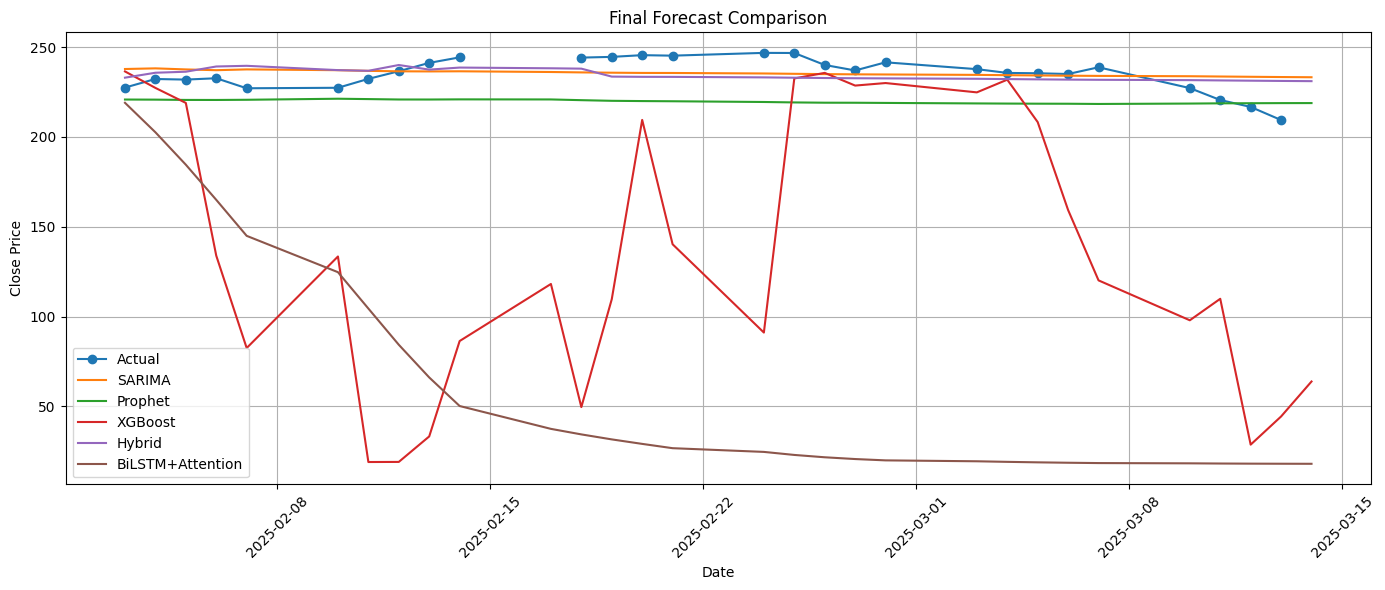

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(forecast_df['Date'], forecast_df['Actual'], label='Actual', marker='o')
plt.plot(forecast_df['Date'], forecast_df['SARIMA'], label='SARIMA')
plt.plot(forecast_df['Date'], forecast_df['Prophet'], label='Prophet')
plt.plot(forecast_df['Date'], forecast_df['XGBoost'], label='XGBoost')
plt.plot(forecast_df['Date'], forecast_df['Hybrid'], label='Hybrid')
plt.plot(forecast_df['Date'], forecast_df['BiLSTM_Attn'], label='BiLSTM+Attention')
plt.xticks(rotation=45)
plt.title("Final Forecast Comparison")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##Side-by-Side Forecast Comparison

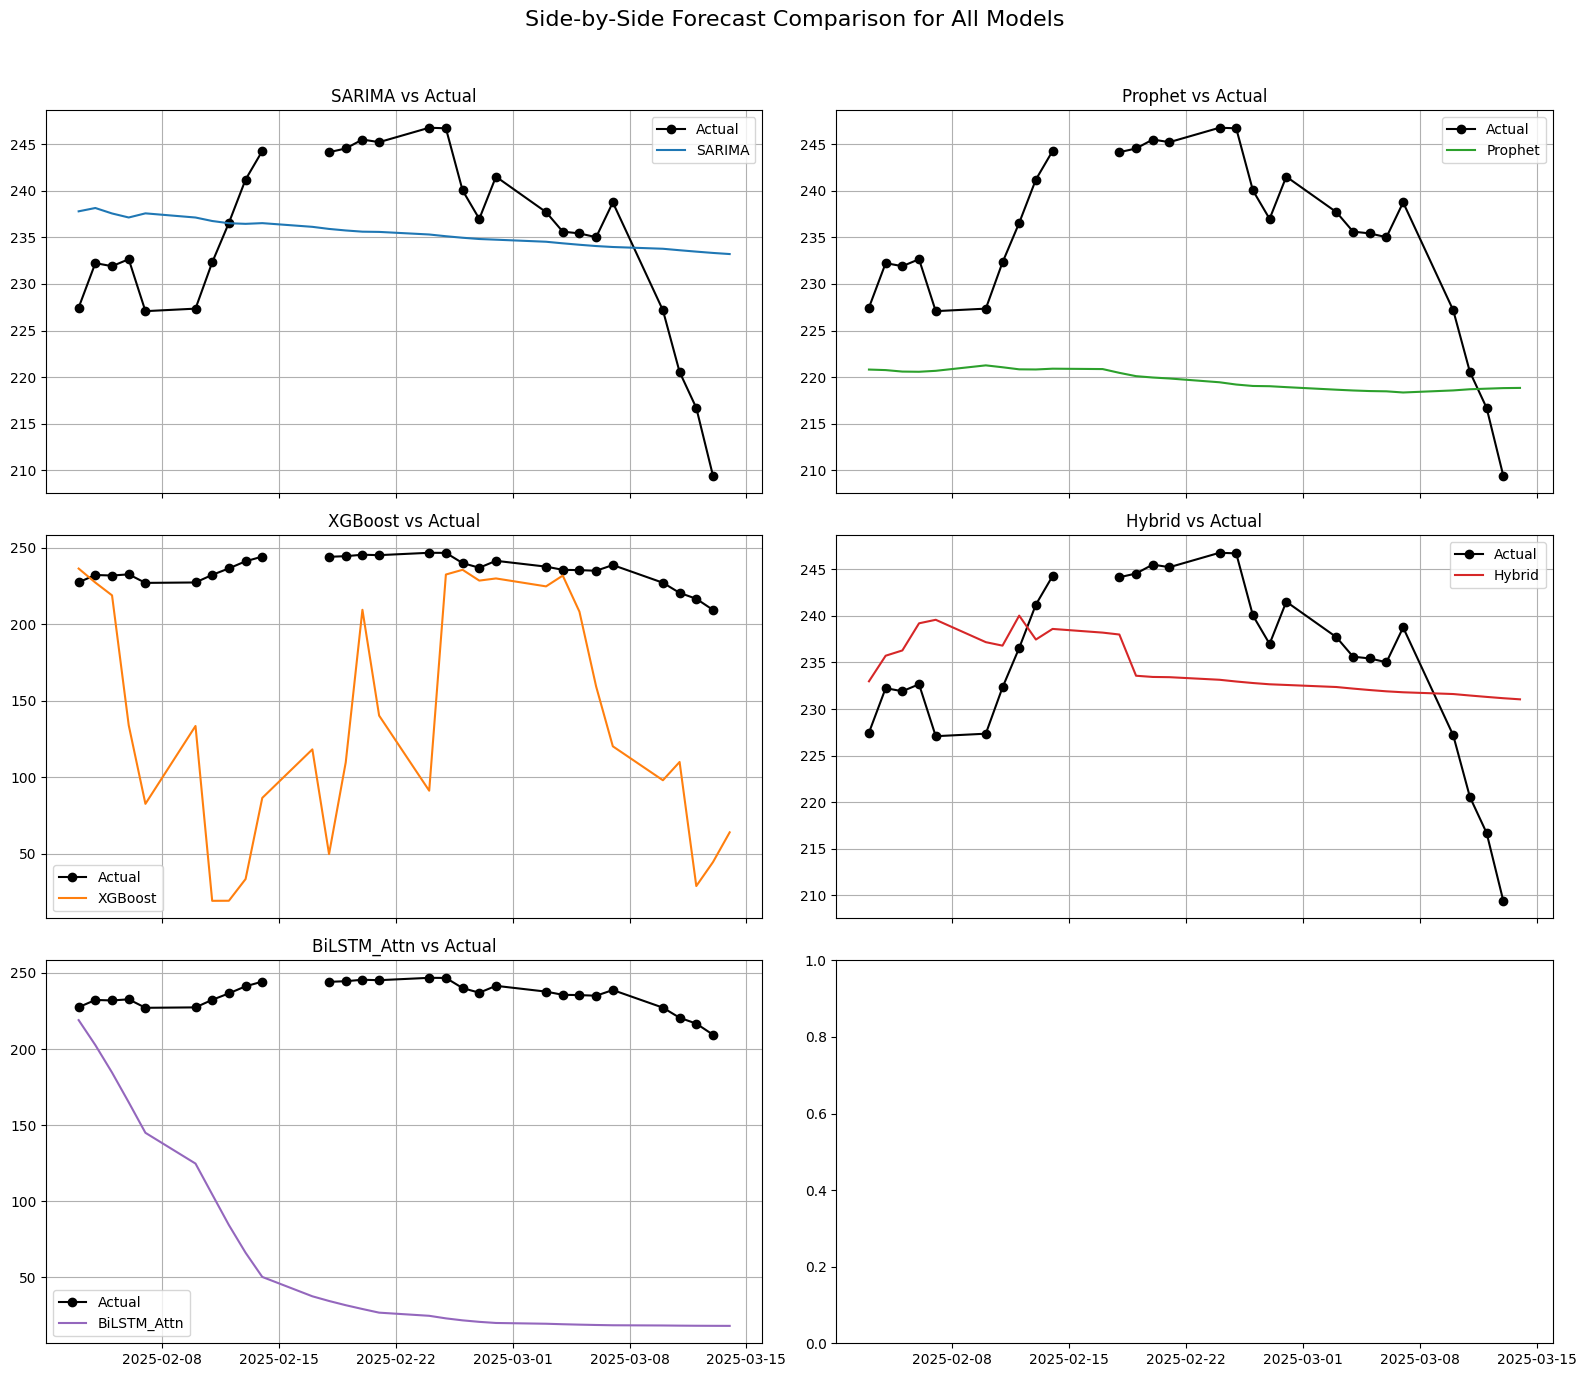

In [ ]:
models = ['SARIMA', 'Prophet', 'XGBoost', 'Hybrid', 'BiLSTM_Attn']
colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red', 'tab:purple']

fig, axs = plt.subplots(3, 2, figsize=(16, 14), sharex=True)
axs = axs.flatten()

for i, model in enumerate(models):
    ax = axs[i]
    ax.plot(forecast_df['Date'], forecast_df['Actual'], label='Actual', marker='o', color='black')
    ax.plot(forecast_df['Date'], forecast_df[model], label=model, color=colors[i])
    ax.set_title(f"{model} vs Actual")
    ax.grid(True)
    ax.legend()

plt.suptitle("Side-by-Side Forecast Comparison for All Models", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#Export to CSV

In [ ]:
forecast_df.to_csv("/content/drive/My Drive/Stock Price Prediction Project/DataSet/final_forecasts_with_all_models.csv", index=False)